# Simple Trading Strategy Using Facebook Stock Data

### Tools Used:
- **Python**: Programming language for data analysis and manipulation.
- **Pandas**: Library for data manipulation and analysis, particularly useful for time series data.
- **Matplotlib**: Library for data visualization to create plots and graphs.

### Project Overview:
In this project, we will develop a simple trading strategy using historical stock data for Facebook (Meta Platforms). The strategy involves creating a plot that compares the 10-day moving average (MA10) with the 50-day moving average (MA50). 

The strategy works as follows:
- When the MA10 (short-term average) crosses above the MA50 (long-term average), it signals a "buy" condition (denoted by 1 in the "Shares" column).
- Otherwise, the strategy signals no action (denoted by 0).
  
We will track the total money accumulated by "buying" a single share of stock when the buy condition is met and calculate the overall performance of this simple trading strategy over a period of time.

#### Key Steps:
1. **Data Collection**: Retrieve historical Facebook stock data.
2. **Moving Average Calculation**: Calculate the 10-day and 50-day moving averages.
3. **Trading Signal Generation**: Create a "Shares" column that indicates whether to buy (1) or do nothing (0).
4. **Strategy Evaluation**: Track the total money accumulated over time based on the trading signals.

---


In [78]:
# pandas library is used for pre-processing and provides dataframe which is good for storing time series data
import pandas as pd  

# Importing matplotlib to create visualizations 
import matplotlib.pyplot as plt



In [79]:
# Loading the data from a CSV file into a pandas DataFrame
fb = pd.read_csv('FB.csv')


In [80]:
# Converting the 'Date' column from string format to datetime format for easier manipulation
# This allows us to work with dates as proper datetime objects (e.g., for sorting, plotting, etc.)
fb['Date'] = pd.to_datetime(fb['Date'])

# Setting the 'Date' column as the index of the DataFrame to make time series operations easier
# This allows us to reference data by date and perform time-based analyses
fb.set_index('Date', inplace=True)


## Adding two columns MA10 and MA50

In [81]:
# Calculate the 10-day moving average of the 'Close' prices and add it as a new column 'MA10'
fb['MA10'] = fb['Close'].rolling(10).mean()

# Calculate the 50-day moving average of the 'Close' prices and add it as a new column 'MA50'
fb['MA50'] = fb['Close'].rolling(50).mean()

# Remove rows with missing values (e.g., rows where moving averages couldn't be calculated due to insufficient data)
fb = fb.dropna()


In [82]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2012-07-30,24.000000,24.040001,23.030001,23.150000,23.150000,29285900,27.521,29.8390
2012-07-31,23.370001,23.370001,21.610001,21.709999,21.709999,56179400,26.883,29.5086
2012-08-01,21.500000,21.580000,20.840000,20.879999,20.879999,44604400,26.060,29.2456
2012-08-02,20.770000,20.840000,19.820000,20.040001,20.040001,56374500,25.164,29.0264
2012-08-03,20.360001,22.160000,19.900000,21.090000,21.090000,80647000,24.397,28.8082


## Adding shares column to make decision based on startegy

In [85]:
# Add a new column 'Shares' to the DataFrame
# Assign 1 if the 10-day moving average (MA10) is greater than the 50-day moving average (MA50)
# Otherwise, assign 0
fb['Shares'] = [1 if fb.loc[ei, 'MA10'] > fb.loc[ei, 'MA50'] else 0 for ei in fb.index]


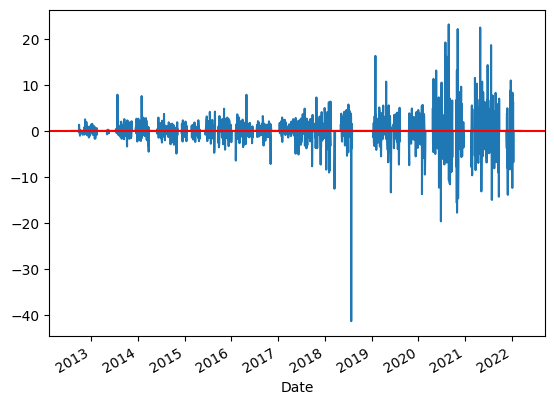

In [86]:
# Create a new column 'Close1' which holds the next day's 'Close' price by shifting the 'Close' column upward by 1
fb['Close1'] = fb['Close'].shift(-1)

# Create a new column 'Profit'
# If 'Shares' equals 1 (indicating a buy signal), calculate the profit as the difference between 'Close1' and 'Close'
# Otherwise, set the profit to 0
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei,'Shares'] == 1 else 0 for ei in fb.index]

# Plot the 'Profit' column
fb['Profit'].plot()

# Add a horizontal red line at y=0 to visually separate positive and negative profit values
plt.axhline(y=0, color='red')


## Displaying total profit earned

In [87]:
# Calculate the cumulative sum of the 'Profit' column to determine the total profit over time
# Add the result as a new column 'Total_Profit'
fb["Total_Profit"] = fb["Profit"].cumsum()

# Display the last few rows of the DataFrame to check the final state, including 'Total_Profit'
fb.tail()


,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Close1,Shares,Profit,Total_Profit
Date,,,,,,,,,,,,
2022-03-18,206.699997,216.800003,206.000000,216.490005,216.490005,52055000,196.570001,250.190801,211.490005,0,0.0,161.620013
2022-03-21,214.500000,214.710007,207.630005,211.490005,211.490005,30142300,198.972002,247.771401,216.649994,0,0.0,161.620013
2022-03-22,211.369995,219.460007,210.179993,216.649994,216.649994,31998800,201.608002,245.468601,213.460007,0,0.0,161.620013
2022-03-23,213.330002,216.800003,212.160004,213.460007,213.460007,23717300,203.104002,243.176401,219.570007,0,0.0,161.620013
2022-03-24,215.000000,220.669998,214.789993,219.570007,219.570007,31466000,205.540002,240.880401,NaN,0,0.0,161.620013


The total money earned by buying one share every time the strategy predicts: 161.62001299999997


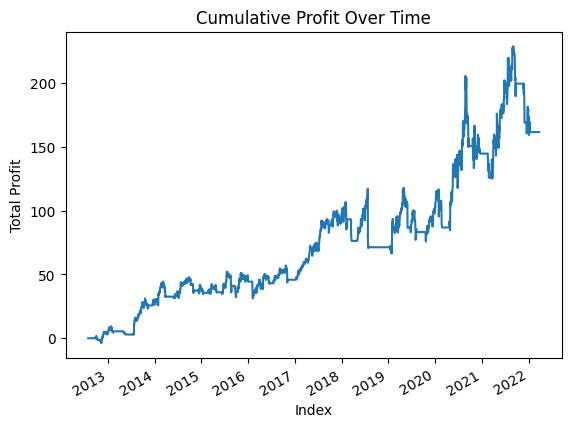

In [89]:
# Print the total money earned based on the strategy
# Access the second-to-last value of the 'Total_Profit' column, as the last row might have NaN (due to 'Close1' shift)
print(f"The total money earned by buying one share every time the strategy predicts: {fb.loc[fb.index[-2], 'Total_Profit']}")

# Plot the 'Total_Profit' column to visualize the cumulative profit over time
fb["Total_Profit"].plot(title="Cumulative Profit Over Time")
plt.xlabel("Index")  # Label for the x-axis
plt.ylabel("Total Profit")  # Label for the y-axis
plt.show()  # Display the plot


